# Handwriting Numbers MNIST Dataset

Let's take a look at a scenario where we can recognize different numbers [0-9].

**The data set are about 70,000 image 60,000 of them as training and 10,000 as testing**

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
file_dir = f"{os.getcwd()}/csv_files/mnist.npz"

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path=file_dir)

### The data set is two sets each of them are two lists of training and labeling data of images.

In [5]:
print("Our Training data are: ", X_train.shape)
print("Our Testing data are: ", X_test.shape)
print("Our labels of Training data are: ", y_train.shape)
print("Our labels of Testing data are: ", y_test.shape)

Our Training data are:  (60000, 28, 28)
Our Testing data are:  (10000, 28, 28)
Our labels of Training data are:  (60000,)
Our labels of Testing data are:  (10000,)


### visualize an image of your data with its features and label

The features of the image 5 are
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  13  88 156
  254 162  89   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

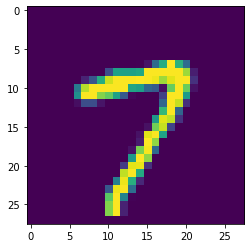

In [6]:
print("The features of the image 5 are\n",X_train[103])
print("The label of the image 5 are: ",y_train[103])
plt.imshow(X_train[103])

## Features normalization

As we saw the values of each pixel in the image is between 0 and 255 which our scale of brightness.
but it's always useful for our model to learn within specific range of values and its help a lot for computational operations that happen in the Neural Network, and helpful for systems doing Math operations fast.

In [7]:
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    '''
    it's useful to use call back function that terminate your algorithm when its reach the accuracy you need.
    it's save a lot of time.
    '''
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True


In [9]:
def NNmodel(X,Y, epochs):
    '''
    A Neural Network that contain just 4 layers.
    input layer instead of each image as 28*28 this will Flatten() to be 784.
    first hidden layer with 512 neurons and use relu as activation function.
    second hidden layer with 256 neurons and use relu as activation function.
    output layer with 10 predicted values in our data.
    '''

    callbacks = myCallback() # instance from the class
    model = tf.keras.Sequential() # create sequential model
    model.add(tf.keras.layers.Flatten()) # input layer
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu)) # first hidden layer
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu)) # second hidden layer
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

# compile the model with Adam optimizer Algorithm
    model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    model.fit(X,Y, epochs=epochs, callbacks=[callbacks])
    return model

In [10]:
model = NNmodel(X_train, y_train, 15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 173us/sample - loss: 0.1831 - accuracy: 0.9440
Epoch 2/15
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0781 - accuracy: 0.9750
Epoch 3/15
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0549 - accuracy: 0.9829
Epoch 4/15
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0441 - accuracy: 0.9861
Epoch 5/15
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0353 - accuracy: 0.9892
Epoch 6/15
59680/60000 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9907
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0289 - accuracy: 0.9907


In [11]:
## Test the model with unseen data
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0890 - accuracy: 0.9771


[0.0889796699856457, 0.9771]

In [12]:
predict = model.predict(X_test)

In [17]:
predict[5]

array([3.6259155e-19, 1.0000000e+00, 1.6906992e-16, 2.5091027e-16,
       2.6250364e-09, 1.6728524e-15, 8.4123921e-18, 4.8010695e-10,
       2.2627188e-10, 4.7787182e-12], dtype=float32)

In [18]:
max(predict[5])

1.0

In [19]:
y_test[5]

1

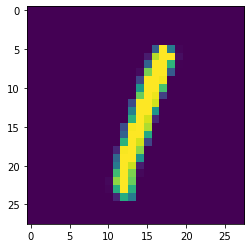

In [20]:
plt.imshow(X_test[5])